### 18th February 2022


## Simplified Approximation of Extraordinary Losses on a Lending Portfolio
## Project Description
Financial Institutions are expected to hold capital reserves sufficient to withstand unlikely but potentially catastrophic loss events. The reserve for a risky loan is higher than the reserve for a safer loan, and this difference should be reflected in the interest rate offered by the lender. However, the loss calculations are too cumbersome to be performed every time someone seeks a loan. The goal of this project is to approximate those loss calculations, with an alternative model that could be fast enough to use during lending, but sufficiently accurate to avoid under- or over- pricing loans.

## Expected outcome
The expected outcome would be a Python function or method that predicts the outcome of the “true” loss calculation process for an arbitrary loan. This function or method will be applied to a TEST dataset whose “true” loss reserve amounts have been withheld, and its performance will be assessed against those “true” amounts.

In [ ]:
#import graphviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns; sns.set(style="ticks", color_codes=True)

## Load Data from csv

In [4]:
df = pd.read_csv('Development Dataset - With Actuals.csv')
df.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495


In [5]:
df.describe()

,Instrument,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
count,151532.000000,1.515320e+05,1.515320e+05,151532.000000,151532.000000,1.515320e+05,151532.000000,1.515320e+05,151532.000000,151532.000000,151532.000000,151532.000000
mean,83299.863382,2.751994e+05,2.661031e+05,0.061460,0.081395,2.756334e+05,7.166776,1.628697e+04,0.056623,0.275837,0.340772,0.082499
std,48078.750392,1.530886e+06,1.495449e+06,0.129754,0.180296,1.531410e+06,7.423330,1.657304e+05,0.134575,0.022782,0.009948,0.026737
min,1.000000,6.300000e-02,6.000000e-02,0.000225,0.009500,6.000000e-02,0.002738,-1.663000e+01,-0.000123,0.192410,0.154790,0.040000
25%,41641.750000,3.151405e+04,2.956708e+04,0.014400,0.009500,3.158485e+04,1.336071,4.247775e+02,0.008701,0.267060,0.341090,0.054900
50%,83361.500000,9.000000e+04,8.422523e+04,0.020700,0.019000,9.000000e+04,4.002738,2.395550e+03,0.028426,0.267060,0.341090,0.086000
75%,124934.250000,2.305225e+05,2.250000e+05,0.062550,0.057000,2.307162e+05,11.835729,8.969438e+03,0.060078,0.267060,0.341090,0.107700
max,166532.000000,2.475000e+08,2.475000e+08,1.000000,0.817000,2.475000e+08,79.427789,3.345287e+07,2.834707,0.592470,0.642590,0.650000


## Building Model on Initial (untreated) Dataset
#### This is just to test models prior to data transformation.

In [6]:
dms = pd.get_dummies(df[['Instrument Type', 'Instrument Subtype']])

y1 = df['Capital - EL Tail Risk Contribution (Capped)']

features_to_drop = ['Instrument','Instrument Type', 'Instrument Subtype', 'Counterparty Alias', 'Book Exposure', 'Industry Alias',
  'Commitment', 'Country of Incorporation', 'Maturity Date', 'Capital - EL Tail Risk Contribution (Capped)', 'Capitalization Rate - EL Tail Risk Contribution']

X_ = df.drop(features_to_drop, axis=1).astype('float64')

X1 = pd.concat([X_, dms[['Instrument Type_Loan', 'Instrument Subtype_Revolver']]], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, 
                                                    y1, 
                                                    test_size=0.25, 
                                                    random_state=42)
#X_train

### Lasso Regression Model

In [7]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X1_train, y1_train)
print('---  R-squared score for LASSO model on Training set: %.3f ' % lasso_model.score(X1_train, y1_train))

pred_lasso = lasso_model.predict(X1_test)

print('--- MAE for LASSO Model on testing set: %.3f' % (mean_absolute_error(y1_test, pred_lasso)))
print('--- R-squared score for LASSO Model on testing set: %.3f' % r2_score(y1_test,pred_lasso))

---  R-squared score for LASSO model on Training set: 0.366 
--- MAE for LASSO Model on testing set: 16554.675
--- R-squared score for LASSO Model on testing set: 0.519


### Ridge Regression Model

In [8]:
ridge_model = Ridge(alpha=0.000)
ridge_model.fit(X1_train, y1_train)
print('--- R-squared score for  RIDGE model on Training set: %.3f ' % ridge_model.score(X1_train, y1_train))

pred_ridge = ridge_model.predict(X1_test)

print('--- MAE for RIDGE Model on testing set: %.3f' % (mean_absolute_error(y1_test, pred_ridge)))
print('--- R-squared for RIDGE Model on testing set: %.3f' % r2_score(y1_test,pred_ridge))

--- R-squared score for  RIDGE model on Training set: 0.366 
--- MAE for RIDGE Model on testing set: 16573.509
--- R-squared for RIDGE Model on testing set: 0.518


# Data Pre-Processing

## Feature Engineering (Data Transformation)

### Dimensionality Reduction
Here, we remove redundant or excess data from the large dataset to make analysis easier.

#### Let’s look at the unique values in the ‘Country of Incorporation’:

In [9]:
#df1['Counterparty Alias'].count()
df['Country of Incorporation'].unique()

array(['CAN'], dtype=object)

The entire column contains only one value so it can be dropped:

In [10]:
df1 = df.copy()
df1 = df1.drop(['Country of Incorporation'], axis=1)

### One Hot Encoding

Some of our data are categorical e.g.they have discrete values. We will use the 1-hot encoding process to transform the values of such columns into binary data (0,1).A column is added for every categorical data, with values 0 or 1 depending on the data.

Then, we drop the categorical columns and other irrelevant columns, and combine the new dataframe and dummies.

In [11]:
df_dummies = pd.get_dummies(df1[['Instrument Type', 'Instrument Subtype']])
df_dummies

,Instrument Type_Bond,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
0,0,1,0,1
1,0,1,1,0
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
151527,0,1,0,1
151528,0,1,1,0
151529,0,1,0,1
151530,0,1,0,1


In [12]:
df2 = df1.drop(['Instrument Type', 'Instrument Subtype'], axis = 1)
df_actuals = pd.concat([df2, df_dummies], axis=1)
df_actuals

,Instrument,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Bond,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
0,86540,C23099,224013.330,224013.33,0.160200,0.0570,IND1,224013.33,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,0,1,0,1
1,86099,C43055,135000.000,135000.00,0.036900,0.8170,IND1,135000.00,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,0,1,1,0
2,5738,C11421,36190.953,36190.95,0.036900,0.0190,IND2,36190.95,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,0,1,0,1
3,165996,C44251,84600.000,84600.00,0.006525,0.0190,IND1,84600.00,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,0,1,0,1
4,118169,C53713,37508.787,37508.78,0.020475,0.2470,IND1,37508.78,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151527,126599,C9779,260814.096,260814.09,0.112725,0.0095,IND1,260814.09,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347,0,1,0,1
151528,165919,C23546,45000.000,45000.00,0.006525,0.8170,IND1,45000.00,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077,0,1,1,0
151529,18381,C24812,182174.661,182174.66,0.020700,0.0095,IND1,182174.66,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235,0,1,0,1
151530,116229,C34960,1179864.819,1179864.81,0.014400,0.0095,IND1,1179864.81,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769,0,1,0,1


### Another Column that requires transformation is the 'Industry Alias' which contains 40 unique values. 
#### Due to higher order values, on-hot encoding will not work well here. Instead, we will substring the value to drop the "IND" and keep the numerical values. 
PS: These are not ordinal values so no natural ordering between the values.

In [13]:
#unique values in column before transformation...
df_actuals['Industry Alias'].unique()

array(['IND1', 'IND2', 'IND3', 'IND23', 'IND8', 'IND5', 'IND30', 'IND6',
       'IND9', 'IND7', 'IND4', 'IND21', 'IND19', 'IND10', 'IND29',
       'IND25', 'IND11', 'IND12', 'IND18', 'IND13', 'IND26', 'IND14',
       'IND40', 'IND32', 'IND15', 'IND28', 'IND22', 'IND27', 'IND17',
       'IND39', 'IND34', 'IND35', 'IND16', 'IND36', 'IND24', 'IND37',
       'IND20', 'IND38', 'IND33', 'IND31'], dtype=object)

In [14]:
#replace column data with substring containing only the numerical values...
temp = df_actuals['Industry Alias'].str[3:5]
df_actuals['Industry Alias'] = temp.astype('float64')
df_actuals['Industry Alias'].unique()

array([ 1.,  2.,  3., 23.,  8.,  5., 30.,  6.,  9.,  7.,  4., 21., 19.,
       10., 29., 25., 11., 12., 18., 13., 26., 14., 40., 32., 15., 28.,
       22., 27., 17., 39., 34., 35., 16., 36., 24., 37., 20., 38., 33.,
       31.])

### Check for Null values in Dataframe

In [15]:
df_actuals.isnull().sum()

Instrument                                         0
Counterparty Alias                                 0
MTM Exposure                                       0
Book Exposure                                      0
1-Year Likelihood                                  0
Severity Used                                      0
Industry Alias                                     0
Commitment                                         0
Maturity Date                                      0
Time to Maturity                                   0
Capital - EL Tail Risk Contribution (Capped)       0
Capitalization Rate - EL Tail Risk Contribution    0
Asset Recovery Correlation                         0
Recovery R-Squared for Simulation                  0
Asset R-Squared for Simulation                     0
Instrument Type_Bond                               0
Instrument Type_Loan                               0
Instrument Subtype_Revolver                        0
Instrument Subtype_Term Loan Amortizing       

#### After the transformation, there are no Null values in our dataset!

## Data Visualization
After cleaning and transforming the data, we will analyze it using different visualization techniques and graphs.

### Correlation Evaluation Metrics
#### Finding Correlation between variables

In [16]:
df_actuals.corr()

,Instrument,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Bond,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
Instrument,1.000000,0.031331,0.032678,-0.037631,0.133743,0.048214,0.031239,0.134354,0.030505,0.026900,-0.076329,0.012388,-0.036613,0.025155,-0.025155,-0.103648,0.102833
MTM Exposure,0.031331,1.000000,0.994324,0.004468,-0.015614,0.224763,0.999870,0.098715,0.635304,0.003419,0.109655,0.252960,0.092684,0.488740,-0.488740,-0.014773,-0.000672
Book Exposure,0.032678,0.994324,1.000000,0.005251,-0.014893,0.225981,0.994469,0.105574,0.632474,0.006446,0.107116,0.246124,0.094338,0.500409,-0.500409,-0.024927,0.009111
1-Year Likelihood,-0.037631,0.004468,0.005251,1.000000,0.043579,0.067299,0.006425,-0.075059,0.093422,0.685772,0.008826,-0.004199,0.011279,-0.006779,0.006779,0.089920,-0.089688
Severity Used,0.133743,-0.015614,-0.014893,0.043579,1.000000,0.054424,-0.015240,-0.225860,0.035684,0.326839,-0.005895,-0.001145,-0.012093,0.024223,-0.024223,0.328026,-0.328727
Industry Alias,0.048214,0.224763,0.225981,0.067299,0.054424,1.000000,0.225012,-0.004765,0.133109,0.048133,0.090013,-0.019485,-0.125626,0.306078,-0.306078,-0.017264,0.007590
Commitment,0.031239,0.999870,0.994469,0.006425,-0.015240,0.225012,1.000000,0.098767,0.638131,0.006334,0.109698,0.252984,0.092523,0.488568,-0.488568,-0.014915,-0.000524
Time to Maturity,0.134354,0.098715,0.105574,-0.075059,-0.225860,-0.004765,0.098767,1.000000,0.061472,-0.028732,0.068657,-0.022664,-0.115136,-0.012671,0.012671,-0.504375,0.504677
Capital - EL Tail Risk Contribution (Capped),0.030505,0.635304,0.632474,0.093422,0.035684,0.133109,0.638131,0.061472,1.000000,0.115471,0.074388,0.174618,0.028822,0.153595,-0.153595,-0.010105,0.005250
Capitalization Rate - EL Tail Risk Contribution,0.026900,0.003419,0.006446,0.685772,0.326839,0.048133,0.006334,-0.028732,0.115471,1.000000,0.017761,0.005755,0.019076,-0.004541,0.004541,0.088297,-0.088137


In [17]:
#checking correlation using pair plots
#v_pairs = sns.pairplot(df_actuals, x_vars=['Book Exposure','MTM Exposure','1-Year Likelihood','Severity Used', 'Commitment',
#                                            'Time to Maturity', 'Asset Recovery Correlation','Recovery R-Squared for Simulation' ], 
#                         y_vars='Capital - EL Tail Risk Contribution (Capped)', height=7, aspect=0.7, kind='reg')
#
#v_pairs.fig.suptitle('Capital ($) vs. other variables', y=1.03)

In [18]:
#checking correlation using pair plots
#corr_pairs = sns.pairplot(df_actuals, x_vars=['Book Exposure','MTM Exposure','Commitment'], 
#                         y_vars='Capital - EL Tail Risk Contribution (Capped)', height=7, aspect=0.7, kind='reg')
#corr_pairs.fig.suptitle('Capital ($) vs. other variables', y=1.03)

#### Including all 3 variables (Commitment, MTM Exposure and Book Exposure) may not improve the prediction accuracy of our model as they are HIGLY correlatated and have a similar relationship with the dependent variable, 'Capital - EL Tail Risk Contribution (Capped)'.

<AxesSubplot:xlabel='Commitment', ylabel='Book Exposure'>

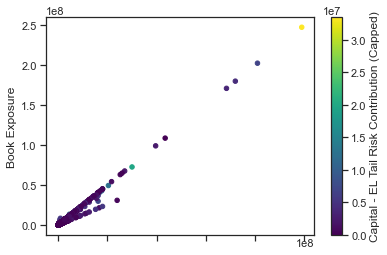

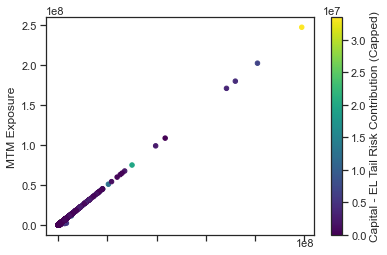

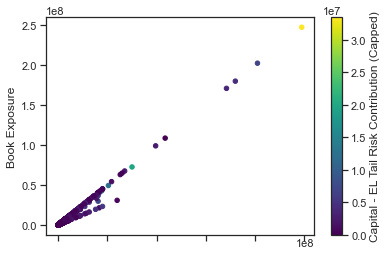

In [19]:
df_actuals.plot.scatter(x='MTM Exposure',
                      y='Book Exposure',
                      c='Capital - EL Tail Risk Contribution (Capped)',
                       colormap='viridis')
df_actuals.plot.scatter(x='Commitment',
                      y='MTM Exposure',
                      c='Capital - EL Tail Risk Contribution (Capped)',
                       colormap='viridis')

df_actuals.plot.scatter(x='Commitment',
                      y='Book Exposure',
                      c='Capital - EL Tail Risk Contribution (Capped)',
                       colormap='viridis')

array([[<AxesSubplot:title={'center':'Commitment'}>,
        <AxesSubplot:title={'center':'MTM Exposure'}>],
       [<AxesSubplot:title={'center':'Book Exposure'}>, <AxesSubplot:>]],
      dtype=object)

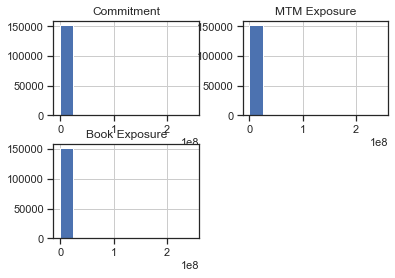

In [20]:
df_actuals[['Commitment', 'MTM Exposure', 'Book Exposure']].hist()

### Using HeatMap to check Correlation

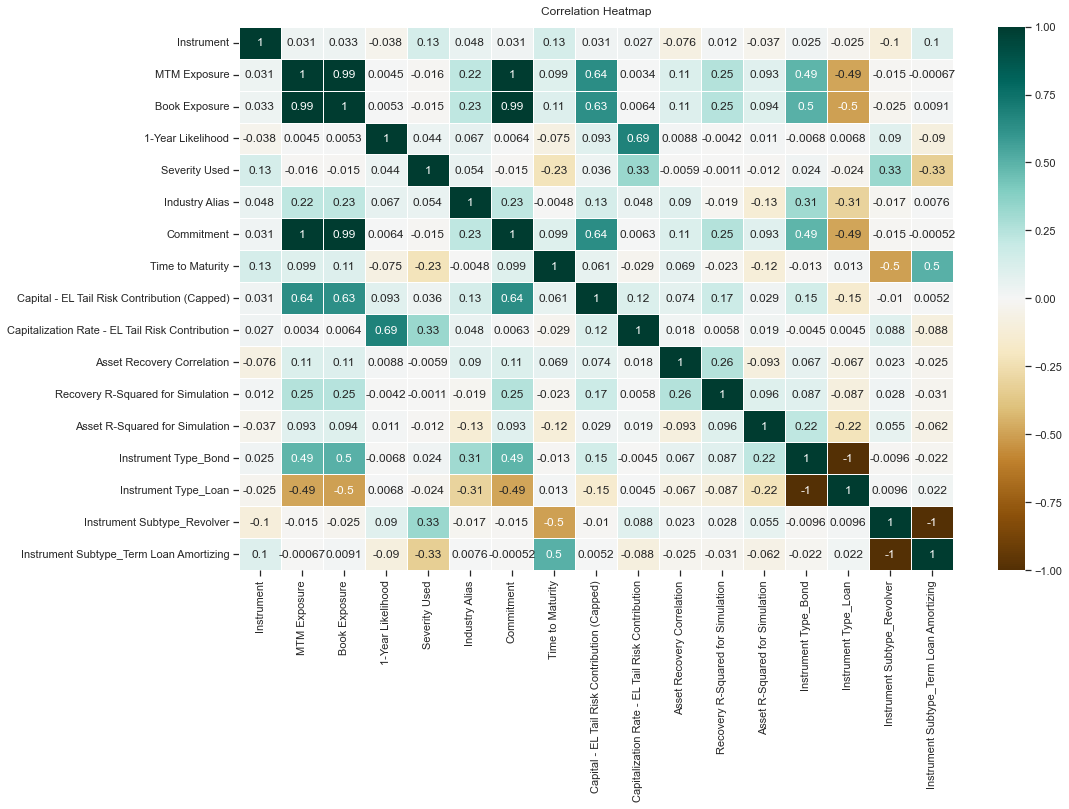

In [21]:
#data = df_actuals.drop(['Instrument'], axis=1)
#fig, ax = plt.subplots(figsize=(16,10))  
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_actuals.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG",linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
#plt.show()

#### Checking the correlation of all features against our dependent variable ‘Capital - EL Tail Risk Contribution (Capped)’.

In [22]:
df_actuals.corr()[['Capital - EL Tail Risk Contribution (Capped)']].sort_values(by='Capital - EL Tail Risk Contribution (Capped)', ascending=False)


,Capital - EL Tail Risk Contribution (Capped)
Capital - EL Tail Risk Contribution (Capped),1.000000
Commitment,0.638131
MTM Exposure,0.635304
Book Exposure,0.632474
Recovery R-Squared for Simulation,0.174618
Instrument Type_Bond,0.153595
Industry Alias,0.133109
Capitalization Rate - EL Tail Risk Contribution,0.115471
1-Year Likelihood,0.093422
Asset Recovery Correlation,0.074388


#### Let's create a colored map that shows the strength of the correlation between every <i>possible</i> independent variable that we want to include in our model againt the dependent (target) variable.

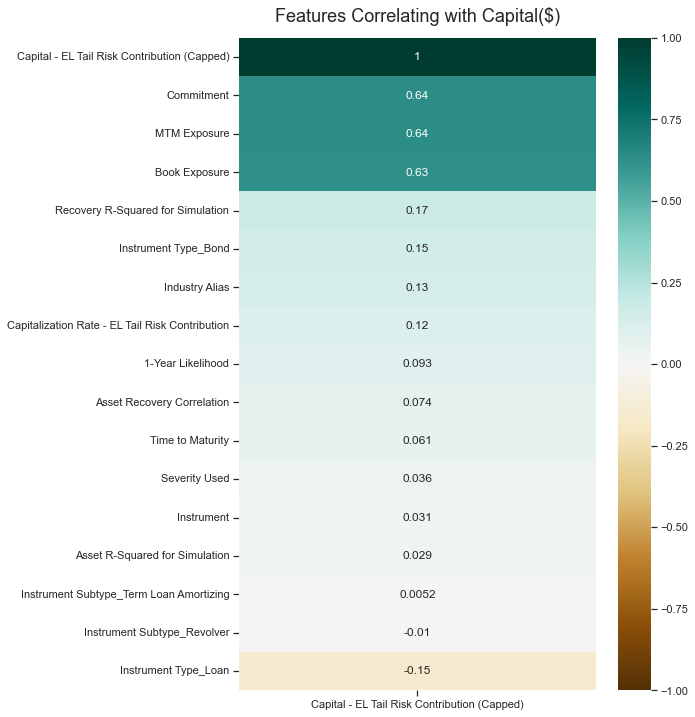

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_actuals.corr()[['Capital - EL Tail Risk Contribution (Capped)']].sort_values(by='Capital - EL Tail Risk Contribution (Capped)', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Capital($)', fontdict={'fontsize':18}, pad=16);
#plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')


### Based on our understanding from the heatmap 'Commitment' (highest correlation) as a potential candidate for the independent variable for our model and re-evaluate:

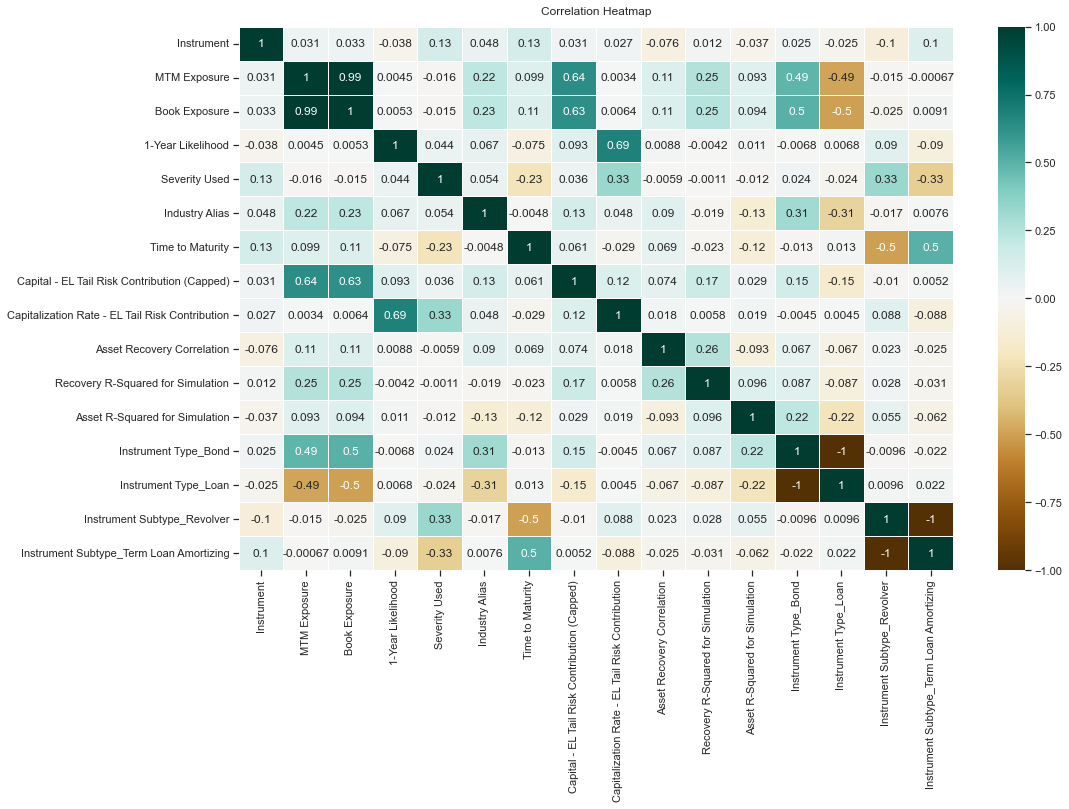

In [24]:
df_1 = df_actuals.copy()
df_1=df_1.drop(['Commitment'], axis=1)
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_1.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG",linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### We again see from the heatmap that MTM Exposure and Book Exposure have similar correlation coefficient to our target variable.

We will drop Book Exposure and re-evaluate with the heatmap. We will also drop one from the pairs of features that are 100% negatively correlated.

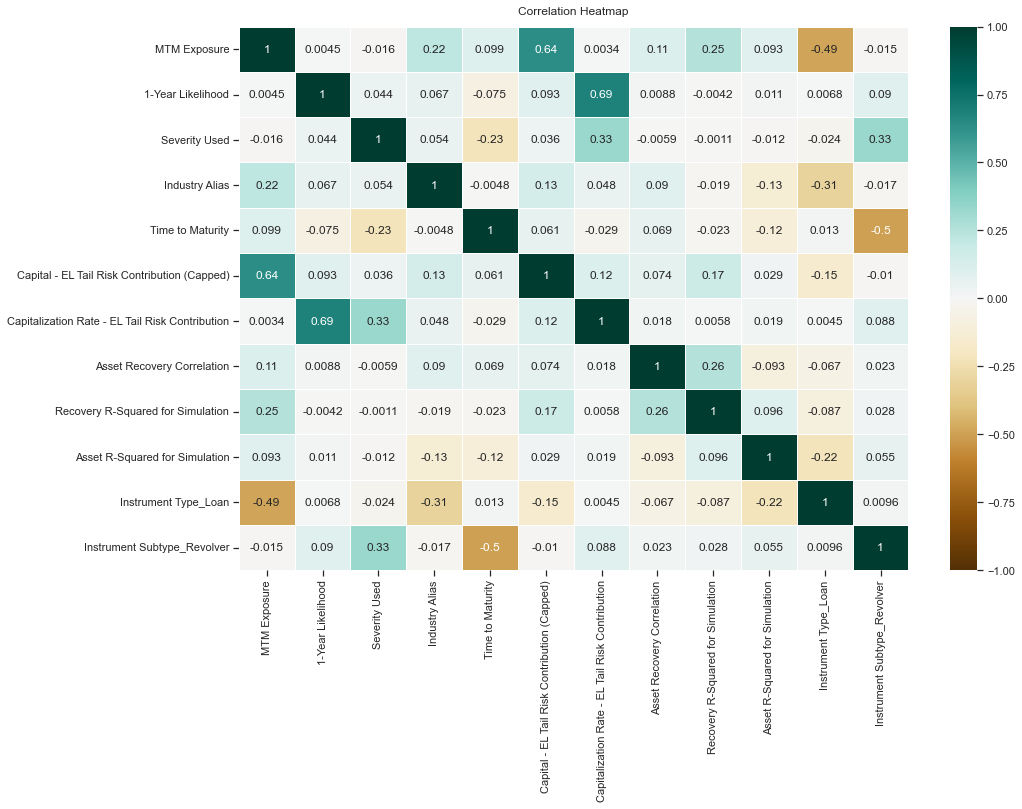

In [25]:
df_2=df_1.drop(['Instrument','Book Exposure', 'Counterparty Alias', 'Instrument Subtype_Term Loan Amortizing', 'Instrument Type_Bond'], axis=1)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df_2.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG",linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

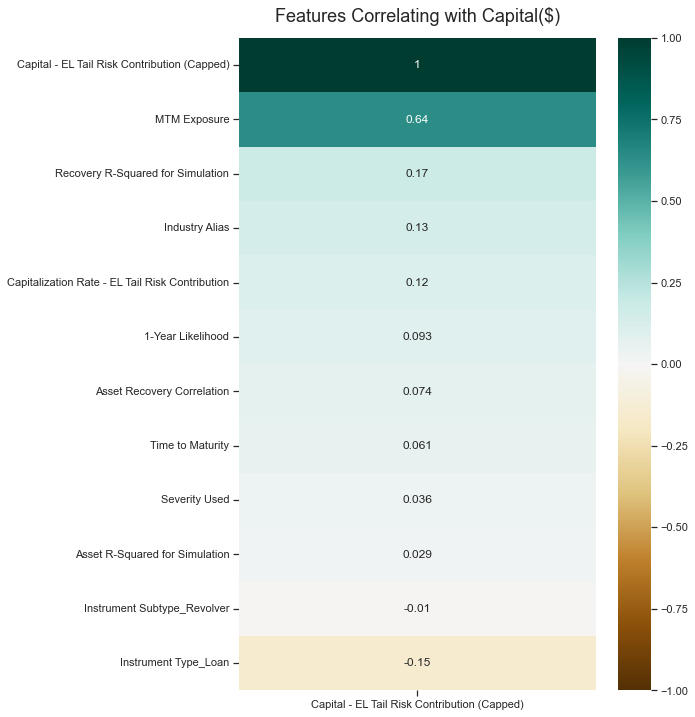

In [26]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_2.corr()[['Capital - EL Tail Risk Contribution (Capped)']].sort_values(by='Capital - EL Tail Risk Contribution (Capped)', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Capital($)', fontdict={'fontsize':18}, pad=16);
#plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')

In [27]:
df_dev = df_2.copy()
df_dev

,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Loan,Instrument Subtype_Revolver
0,224013.330,0.160200,0.0570,1.0,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,1,0
1,135000.000,0.036900,0.8170,1.0,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,1,1
2,36190.953,0.036900,0.0190,2.0,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,1,0
3,84600.000,0.006525,0.0190,1.0,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,1,0
4,37508.787,0.020475,0.2470,1.0,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151527,260814.096,0.112725,0.0095,1.0,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347,1,0
151528,45000.000,0.006525,0.8170,1.0,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077,1,1
151529,182174.661,0.020700,0.0095,1.0,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235,1,0
151530,1179864.819,0.014400,0.0095,1.0,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769,1,0


## Rescaling the data

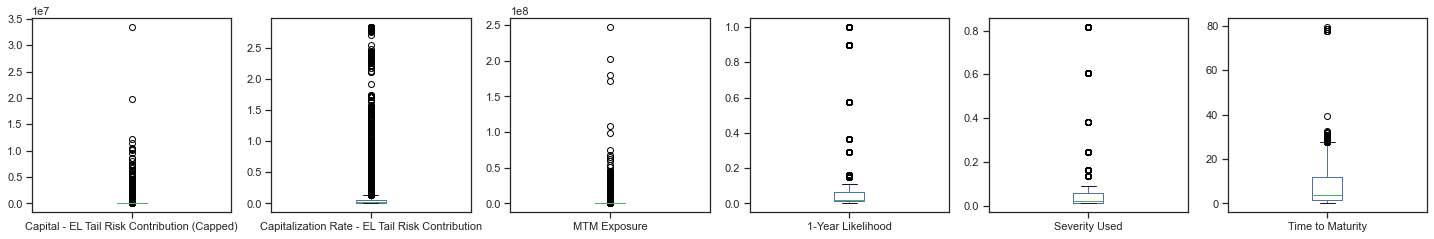

In [28]:
#Prior to rescaling...
df_dev[['Capital - EL Tail Risk Contribution (Capped)','Capitalization Rate - EL Tail Risk Contribution','MTM Exposure','1-Year Likelihood', 'Severity Used', 'Time to Maturity']].plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False,figsize=(25,25))
plt.show()

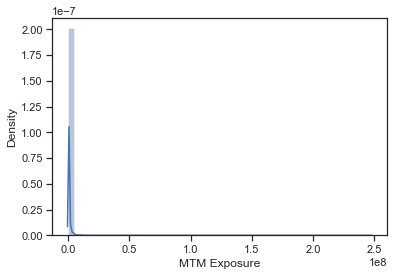

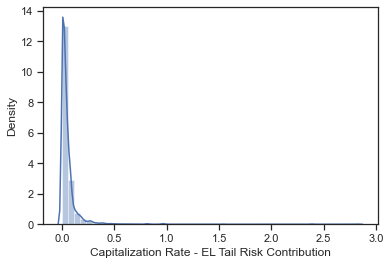

<Figure size 432x288 with 0 Axes>

In [29]:
#Prior to rescaling...
sns.distplot(df_dev['MTM Exposure'])
fig = plt.figure()

sns.distplot(df_dev['Capitalization Rate - EL Tail Risk Contribution'])
fig = plt.figure()

#### As we can see, the data is skewed to left. 
##### Let's get the square root values for the MTM Exposure and the Capital - EL Tail Risk Contribution (Capped) to get a better distribution.

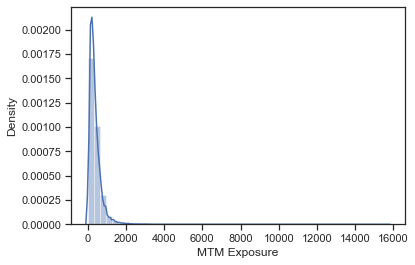

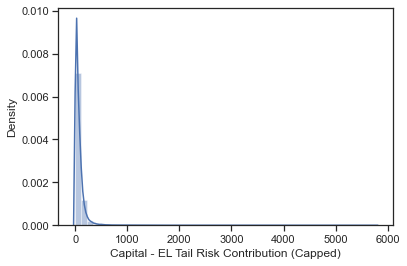

<Figure size 432x288 with 0 Axes>

In [30]:
temp1 = np.sqrt(df_dev['MTM Exposure'])
sns.distplot(temp1)
fig = plt.figure()

temp = np.sqrt(df_dev['Capital - EL Tail Risk Contribution (Capped)'])
sns.distplot(temp)
fig = plt.figure()

## Handling Outliers
##### The 'Capital - EL Tail Risk Contribution (Capped)' column contains 906 rows that are <=0. We will drop these rows as it unlikely for actual values for Capital(USD) to be <=0. Also, we have a large dataset, such that dropping 906 rows will not impact the qaulity of our training data

#### Let's try the logarithmic values for the MTM Exposure and the Capital - EL Tail Risk Contribution (Capped) to get a better distribution.

In [31]:
#use a masked array and NumPy will automatically apply a mask for the invalid values 
#df_dev['MTM Exposure_log'] = np.log((np.ma.array(df_dev['MTM Exposure'])))
#df_dev['Capital_log'] = np.log((np.ma.array(df_dev['Capital - EL Tail Risk Contribution (Capped)'])))
df_dev['MTM Exposure_log'] = np.log(df_dev['MTM Exposure'])
df_dev['Capital_log'] = np.log(df_dev['Capital - EL Tail Risk Contribution (Capped)'])

#### Applying log transformation introduced Null values into our dataset as a result of negative values present.

In [32]:
df_dev.isnull().sum()

MTM Exposure                                        0
1-Year Likelihood                                   0
Severity Used                                       0
Industry Alias                                      0
Maturity Date                                       0
Time to Maturity                                    0
Capital - EL Tail Risk Contribution (Capped)        0
Capitalization Rate - EL Tail Risk Contribution     0
Asset Recovery Correlation                          0
Recovery R-Squared for Simulation                   0
Asset R-Squared for Simulation                      0
Instrument Type_Loan                                0
Instrument Subtype_Revolver                         0
MTM Exposure_log                                    0
Capital_log                                        86
dtype: int64

#### We will drop those 86 rows containing null values:

In [33]:
df_dev.dropna(axis='rows', inplace = True)
df_dev

,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Loan,Instrument Subtype_Revolver,MTM Exposure_log,Capital_log
0,224013.330,0.160200,0.0570,1.0,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,1,0,12.319461,10.964705
1,135000.000,0.036900,0.8170,1.0,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,1,1,11.813030,10.058758
2,36190.953,0.036900,0.0190,2.0,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,1,0,10.496564,7.351171
3,84600.000,0.006525,0.0190,1.0,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,1,0,11.345690,6.556579
4,37508.787,0.020475,0.2470,1.0,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,1,0,10.532331,8.189344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151527,260814.096,0.112725,0.0095,1.0,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347,1,0,12.471563,9.931315
151528,45000.000,0.006525,0.8170,1.0,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077,1,1,10.714418,8.446281
151529,182174.661,0.020700,0.0095,1.0,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235,1,0,12.112721,8.139837
151530,1179864.819,0.014400,0.0095,1.0,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769,1,0,13.980910,10.168282


#### The 'Capital_log' column contains 4026 rows that are <=0. We will drop these rows as it unlikely for actual values for Capital(USD) to be <=0. Also, we have a large dataset, such that dropping these rows will not impact the qaulity of our training data

In [34]:
df_dev = df_dev[df_dev['Capital_log'] >=0 ].reset_index(drop=True)
df_dev

,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Loan,Instrument Subtype_Revolver,MTM Exposure_log,Capital_log
0,224013.330,0.160200,0.0570,1.0,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,1,0,12.319461,10.964705
1,135000.000,0.036900,0.8170,1.0,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,1,1,11.813030,10.058758
2,36190.953,0.036900,0.0190,2.0,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,1,0,10.496564,7.351171
3,84600.000,0.006525,0.0190,1.0,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,1,0,11.345690,6.556579
4,37508.787,0.020475,0.2470,1.0,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,1,0,10.532331,8.189344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147415,260814.096,0.112725,0.0095,1.0,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347,1,0,12.471563,9.931315
147416,45000.000,0.006525,0.8170,1.0,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077,1,1,10.714418,8.446281
147417,182174.661,0.020700,0.0095,1.0,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235,1,0,12.112721,8.139837
147418,1179864.819,0.014400,0.0095,1.0,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769,1,0,13.980910,10.168282


In [35]:
#df_dev = df_dev.drop(df_actuals[df_actuals['Capital - EL Tail Risk Contribution (Capped)'] <=0].index)

In [36]:
df_dev.isnull().sum()

MTM Exposure                                       0
1-Year Likelihood                                  0
Severity Used                                      0
Industry Alias                                     0
Maturity Date                                      0
Time to Maturity                                   0
Capital - EL Tail Risk Contribution (Capped)       0
Capitalization Rate - EL Tail Risk Contribution    0
Asset Recovery Correlation                         0
Recovery R-Squared for Simulation                  0
Asset R-Squared for Simulation                     0
Instrument Type_Loan                               0
Instrument Subtype_Revolver                        0
MTM Exposure_log                                   0
Capital_log                                        0
dtype: int64

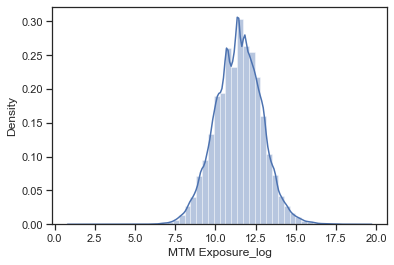

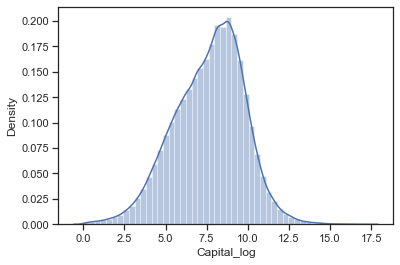

<Figure size 432x288 with 0 Axes>

In [37]:
# After to rescaling
sns.distplot(df_dev['MTM Exposure_log'])
fig = plt.figure()

sns.distplot(df_dev['Capital_log'])
fig = plt.figure()

#### getting the log values works better than the square root.

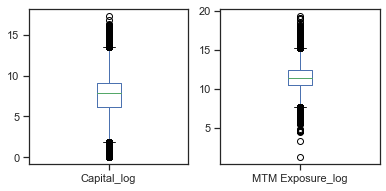

In [38]:
#After rescaling..
df_dev[['Capital_log','MTM Exposure_log']].plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False,figsize=(20,20))
plt.show()

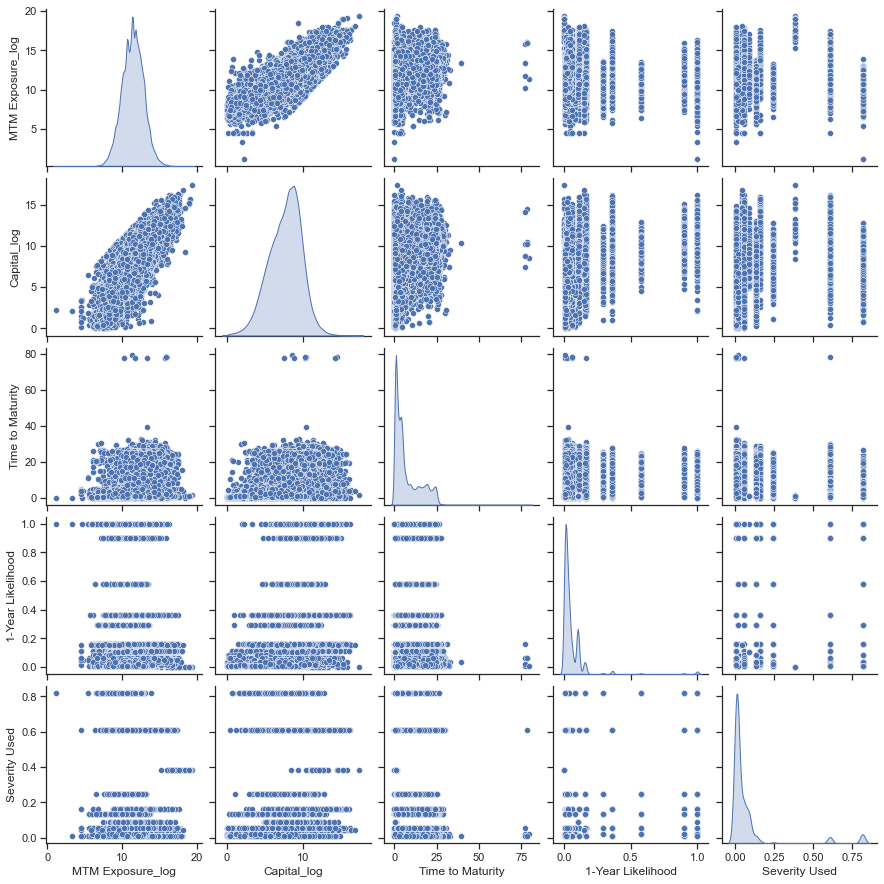

In [39]:
sns.pairplot(data=df_dev[['MTM Exposure_log','Capital_log', 'Time to Maturity', '1-Year Likelihood', 'Severity Used']], diag_kind='kde')

## Creating Linear Regression Models

In [40]:
df_dev

,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Instrument Type_Loan,Instrument Subtype_Revolver,MTM Exposure_log,Capital_log
0,224013.330,0.160200,0.0570,1.0,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,1,0,12.319461,10.964705
1,135000.000,0.036900,0.8170,1.0,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,1,1,11.813030,10.058758
2,36190.953,0.036900,0.0190,2.0,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,1,0,10.496564,7.351171
3,84600.000,0.006525,0.0190,1.0,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,1,0,11.345690,6.556579
4,37508.787,0.020475,0.2470,1.0,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,1,0,10.532331,8.189344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147415,260814.096,0.112725,0.0095,1.0,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347,1,0,12.471563,9.931315
147416,45000.000,0.006525,0.8170,1.0,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077,1,1,10.714418,8.446281
147417,182174.661,0.020700,0.0095,1.0,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235,1,0,12.112721,8.139837
147418,1179864.819,0.014400,0.0095,1.0,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769,1,0,13.980910,10.168282


#### Checking Correlation Matrix after rescaling

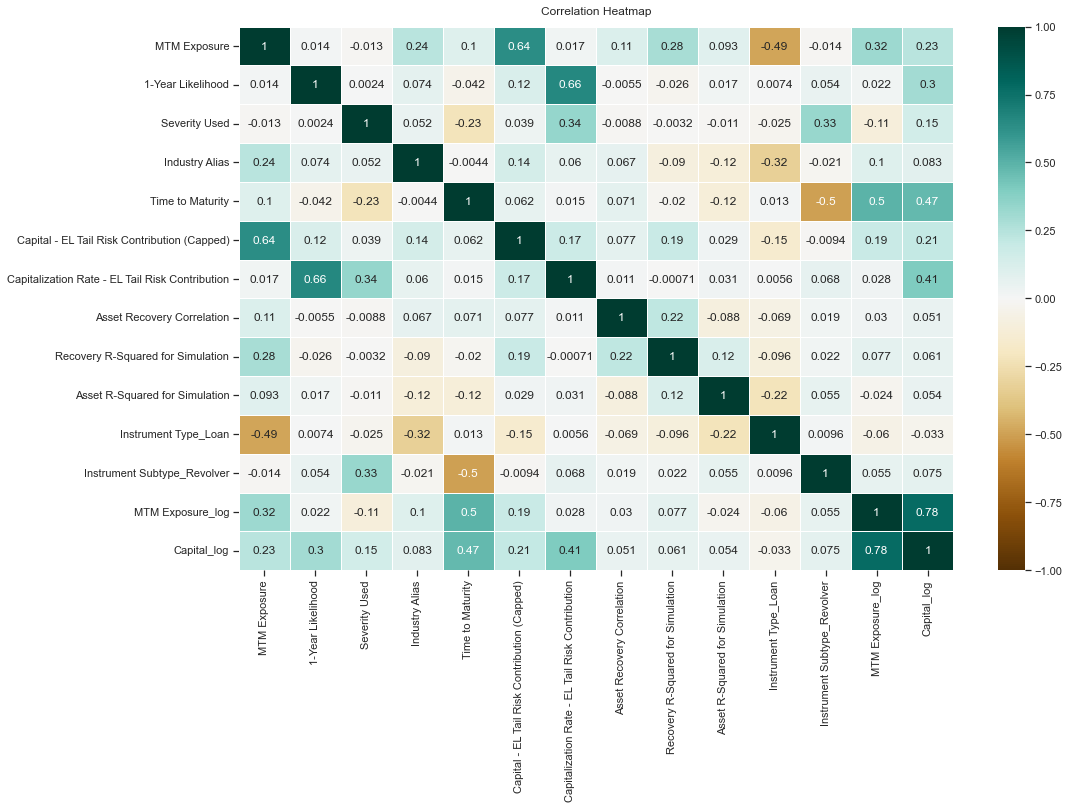

In [41]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_dev.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG",linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Feature Selection and Scaling
 - Select independent variables as features.
 - Split the data set into train and test set with the first 70% of the data for training and the remaining 30% for testing.
 - Standardize numeric input variables by converting data to smaller values in the range 0 to 1 so that all of them lie on the    same scale and one doesn’t overpower the other. 

In [42]:
features = ['1-Year Likelihood', 'Severity Used', 'Time to Maturity','Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
        'Asset R-Squared for Simulation', 'MTM Exposure_log', 'Instrument Subtype_Revolver', 'Instrument Type_Loan']
 #'Instrument Subtype_Revolver',
X = df_dev[features]
y = df_dev['Capital_log']
#y = df_dev['Capitalization Rate - EL Tail Risk Contribution']


#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#scaler =  StandardScaler()
#X_train[features]=scaler.fit_transform(X_train[features])
#X_test[features]=scaler.transform(X_test[features])

# Normalize the data
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train[features])
X_test = scaler.transform(X_test[features])

In [43]:
display(pd.DataFrame(X_train, columns=features).head())
display(y_train)

,1-Year Likelihood,Severity Used,Time to Maturity,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTM Exposure_log,Instrument Subtype_Revolver,Instrument Type_Loan
0,-0.478203,-0.798320,-1.547605,-0.290067,0.040202,1.814750,-2.877754,-0.652371,0.015875
1,-1.041071,-0.798320,1.586472,-0.290067,0.040202,0.192234,0.944118,-0.652371,0.015875
2,-1.119686,0.608927,-0.034223,-0.290067,0.040202,0.964228,-1.284082,-0.652371,0.015875
3,0.763693,-0.798320,-1.115281,2.079007,-0.080533,0.192234,-2.995857,-0.652371,0.015875
4,-1.119686,-0.441398,1.490277,2.079007,-0.080533,-1.101872,0.714530,-0.652371,0.015875


5360       2.405142
38863      9.055569
55971      4.279440
112061     3.142427
64712      8.946083
            ...    
41993      8.905950
97639     10.708108
95939      5.211451
117952    10.414848
43567      5.746267
Name: Capital_log, Length: 103194, dtype: float64

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(103194, 9) (103194,)
(44226, 9) (44226,)


# Training the Models

## Decision Tree (Regression Tree)

In [45]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
rt = DecisionTreeRegressor(max_depth=5)
model_r = rt.fit(X_train, y_train)

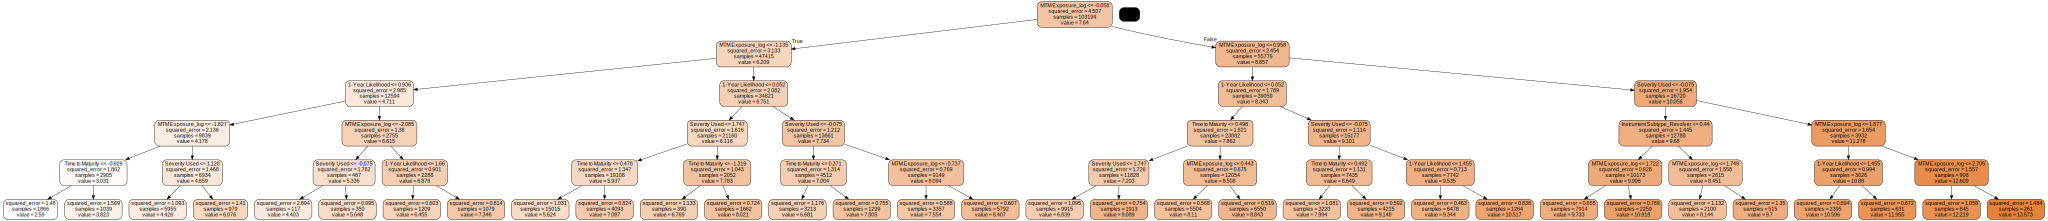

In [46]:
import pydotplus
import graphviz
from sklearn import tree

dot_data = export_graphviz(rt, feature_names=X.columns, class_names=sorted(y_test.unique()), 
                           out_file=None,filled=True,rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"30,30!"')
#pydot_graph.write_png('resized_tree.png')
#graphviz.Source(dot_data)
#gvz_graph.format = "svg"
gvz_graph = graphviz.Source(pydot_graph.to_string(), format='svg')
gvz_graph.render("new_gvz_graph_Decision_Tree")
gvz_graph

In [47]:
rt.max_depth = 9
model_r = rt.fit(X_train, y_train)
sc =  model_r.score(X_train, y_train)
sc

0.9082841154127781

In [48]:
y_test_pred = model_r.predict(X_test)

In [49]:
print('Decision Tree - R squared Traning set: {:.2f}'.format(sc))
print('------------------------------------------------')
print('Decision Tree - R squared testing set: {:.2f}'.format(r2_score(y_test, y_test_pred)))
print('Decision Tree - MAE testing set: {:.2f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Decision Tree- RMSE testing set {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Decision Tree - R squared Traning set: 0.91
------------------------------------------------
Decision Tree - R squared testing set: 0.90
Decision Tree - MAE testing set: 0.49
Decision Tree- RMSE testing set 0.67


In [50]:
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 0.49


## Random Forests: Decision Trees

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth =5)
model_rf = rf.fit(X_train, y_train)
#scores = cross_val_score(model, X_train, y_train, cv=5)
#scores.mean()#0.8646912230914889

### Let’s plot the first decision tree (accessed by index 0) in our random forest model.

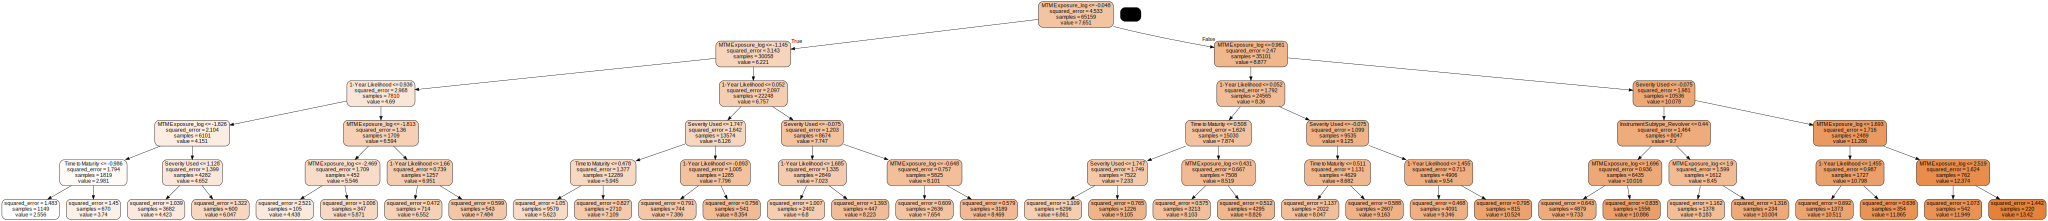

In [52]:
rf_dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=X.columns,
                           class_names=sorted(y.unique()), 
                           filled=True, impurity=True, 
                           rounded=True)

rf_pydot_graph = pydotplus.graph_from_dot_data(rf_dot_data)
#rf_pydot_graph.write_png('random_forest_tree.png')
rf_pydot_graph.set_size('"40,40!"')
#rf_pydot_graph.write_png('resized_tree.png')
#graphviz.Source(dot_data)
rf_gvz_graph = graphviz.Source(rf_pydot_graph.to_string(), format='svg')
gvz_graph.render("new_gvz_graph_Random_Forest")
rf_gvz_graph

In [53]:
rf.max_depth = 9
model_rf = rf.fit(X_train, y_train)
rf_t_score = model_rf.score(X_train, y_train)
rf_t_score

0.9179973814731711

In [54]:
rf_pred = model_rf.predict(X_test)

print('Random Forest - R score Training set: {:.2f}'.format(rf_t_score))
print('------------------------------------------------')
print('Random Forest - R squared testing set: {:.2f}'.format(r2_score(y_test, rf_pred)))
print('Random Forest - MAE testing set: {:.2f}'.format(mean_absolute_error(y_test, rf_pred)))
print('Random Forest - RMSE testing set {:.2f}'.format(np.sqrt(mean_squared_error(y_test, rf_pred))))

Random Forest - R score Training set: 0.92
------------------------------------------------
Random Forest - R squared testing set: 0.91
Random Forest - MAE testing set: 0.46
Random Forest - RMSE testing set 0.63


In [55]:
#plt.figure(figsize=(30,30))
#_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, fontsize=12)
#plt.savefig('tree_high_dpi', dpi=100)

### Feature Importance

In [56]:
for importance, name in sorted(zip(rf.feature_importances_, X.columns),reverse=True):
    print (name, importance)

MTM Exposure_log 0.6614494370140128
1-Year Likelihood 0.1608799672122887
Severity Used 0.08560304029112428
Time to Maturity 0.07163696969699697
Instrument Subtype_Revolver 0.013308428223971576
Asset R-Squared for Simulation 0.006607120770791029
Recovery R-Squared for Simulation 0.0003818806364828719
Asset Recovery Correlation 0.00013275785637523099
Instrument Type_Loan 3.9829795658454475e-07


In [57]:
#model = RandomForestRegressor()
# evaluate the model
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [58]:
#joblib_lasso_CV_model = joblib.load(ridge_CV_model_file)
#joblib_lasso_CV_model


In [59]:
#from sklearn.ensemble import RandomForestClassifier
#random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
#from sklearn.model_selection import cross_val_predict
#predictions=cross_val_predict (random_forest_clf, X, y)
#import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(y, predictions)
#plt.show()